In [3]:
import numpy as np
import pandas as pd

In [4]:
df_store=pd.read_csv("./train.csv")
df_store_copy=df_store.copy()

In [5]:
df_store.shape
df_store.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df_store.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [7]:
df_store["Postal Code"].fillna(0,inplace=True)
df_store.isna().sum()
df_store.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


<Axes: xlabel='Sales', ylabel='Count'>

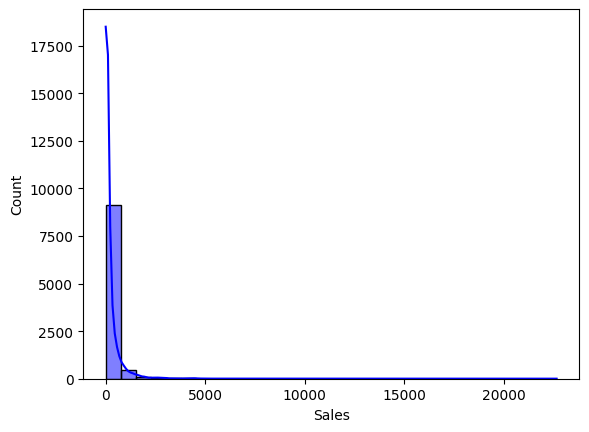

In [11]:
import seaborn as sns
sns.histplot(df_store['Sales'], bins=30, kde=True, color='blue', edgecolor='black')

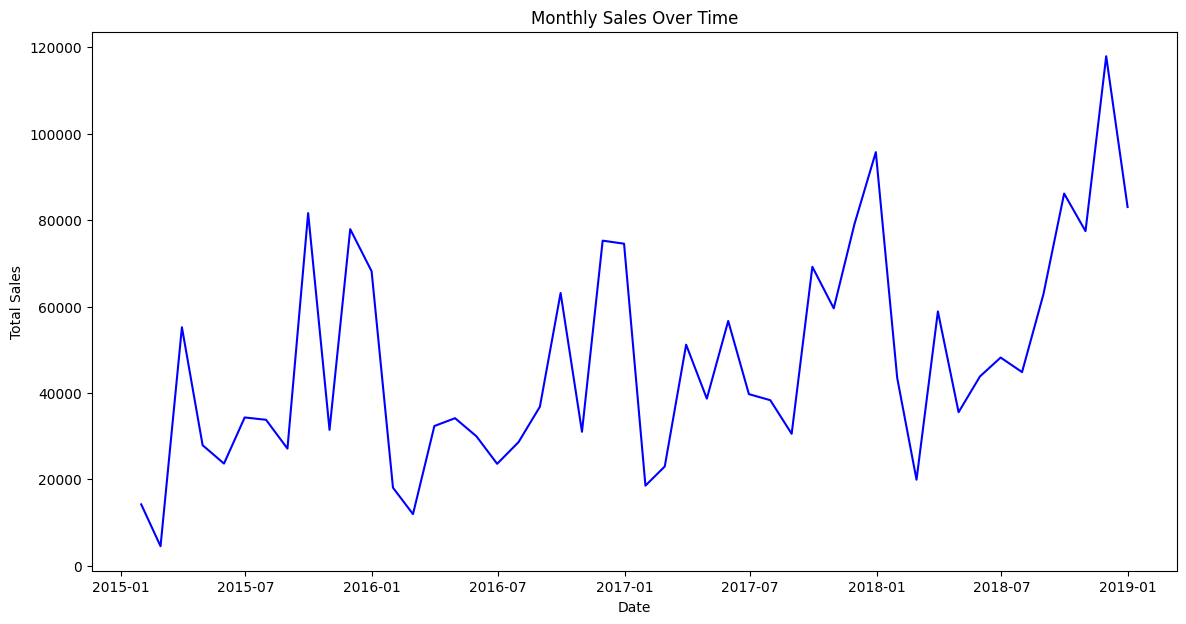

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_store['Order Date'] = pd.to_datetime(df_store['Order Date'], format='%d/%m/%Y')

df_store.set_index('Order Date', inplace=True)

monthly_sales = df_store['Sales'].resample('M').sum()

plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, color='blue')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


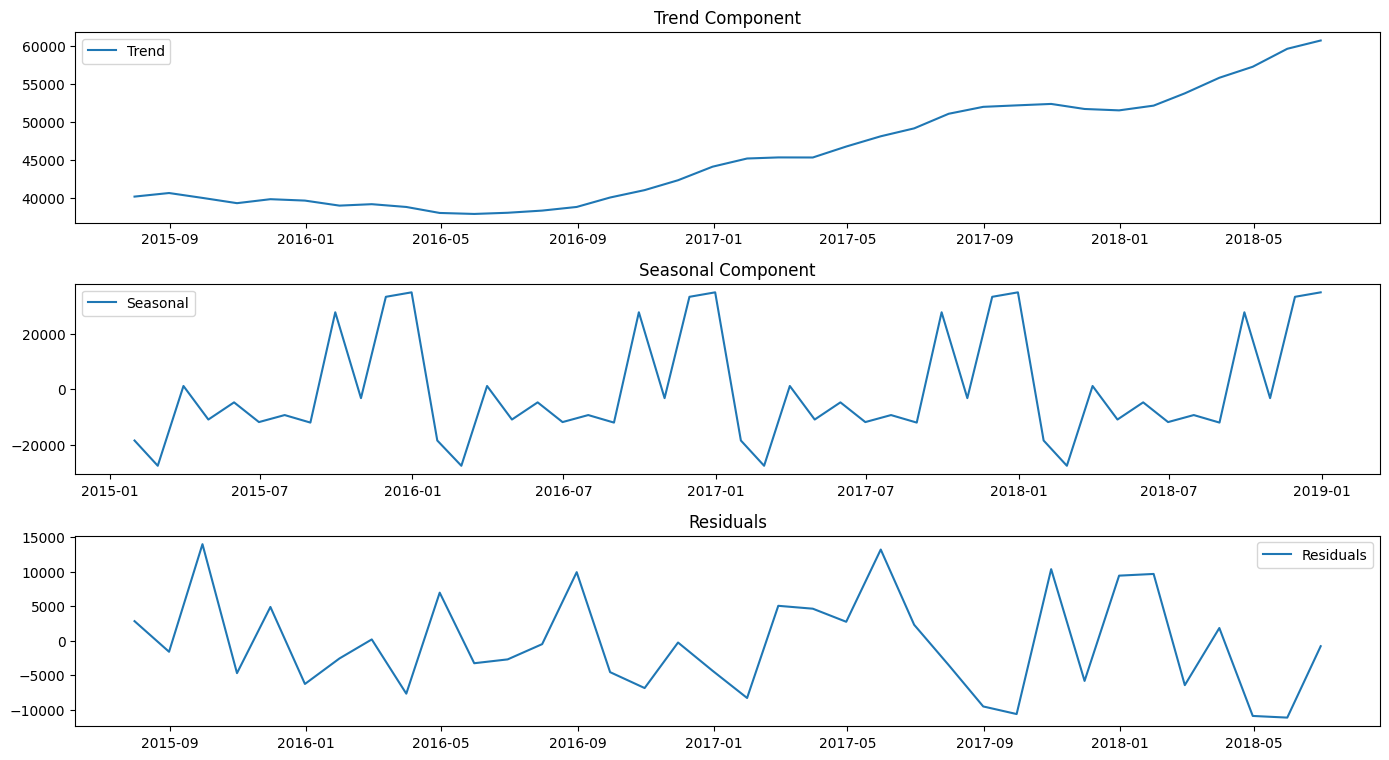

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_store
monthly_sales = df_store['Sales'].resample('M').sum()

# Perform seasonal decomposition
result = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(14, 10))

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

# Residuals
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()